# Report: porto-seguero dataset findings 

In [2]:
import pandas as pd
from scipy.io import arff

# Load the dataset
data, meta = arff.loadarff("./data/our/porto-seguero.arff")
df = pd.DataFrame(data)

# Display basic information about the dataset
print("Basic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 39 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             595212 non-null  float64
 1   target         595212 non-null  object 
 2   ps_ind_01      595212 non-null  float64
 3   ps_ind_02_cat  595212 non-null  object 
 4   ps_ind_03      595212 non-null  float64
 5   ps_ind_04_cat  595212 non-null  object 
 6   ps_ind_05_cat  595212 non-null  object 
 7   ps_ind_06_bin  595212 non-null  object 
 8   ps_ind_07_bin  595212 non-null  object 
 9   ps_ind_08_bin  595212 non-null  object 
 10  ps_ind_09_bin  595212 non-null  object 
 11  ps_ind_10_bin  595212 non-null  object 
 12  ps_ind_11_bin  595212 non-null  object 
 13  ps_ind_12_bin  595212 non-null  object 
 14  ps_ind_13_bin  595212 non-null  object 
 15  ps_ind_14      595212 non-null  float64
 16  ps_ind_15      595212 non-null  float64
 17  ps_ind_16_

In [3]:
meta

Dataset: R_data_frame
	id's type is numeric
	target's type is nominal, range is ('0', '1')
	ps_ind_01's type is numeric
	ps_ind_02_cat's type is nominal, range is ('1', '2', '3', '4')
	ps_ind_03's type is numeric
	ps_ind_04_cat's type is nominal, range is ('0', '1')
	ps_ind_05_cat's type is nominal, range is ('0', '1', '2', '3', '4', '5', '6')
	ps_ind_06_bin's type is nominal, range is ('0', '1')
	ps_ind_07_bin's type is nominal, range is ('0', '1')
	ps_ind_08_bin's type is nominal, range is ('0', '1')
	ps_ind_09_bin's type is nominal, range is ('0', '1')
	ps_ind_10_bin's type is nominal, range is ('0', '1')
	ps_ind_11_bin's type is nominal, range is ('0', '1')
	ps_ind_12_bin's type is nominal, range is ('0', '1')
	ps_ind_13_bin's type is nominal, range is ('0', '1')
	ps_ind_14's type is numeric
	ps_ind_15's type is numeric
	ps_ind_16_bin's type is nominal, range is ('0', '1')
	ps_ind_17_bin's type is nominal, range is ('0', '1')
	ps_ind_18_bin's type is nominal, range is ('0', '1')
	p

## Key points

- Variable are groups accoriding to the feature names (e.g., ind, reg, car). 
- Feature names include the postfix bin to indicate binary features and cat to indicate categorical features. **Features without these designations are either continuous or ordinal**. 
- **Values of -1** indicate that the feature was missing from the observation. 
- The target columns signifies whether or not a claim was filed for that policy holder.

In [4]:
# split of the columns by type
COLUMS_TO_CHECK = df.columns.to_list()
COLUMS_TO_CHECK = [col for col in COLUMS_TO_CHECK if col not in ['target',"id"]]

bin_columns = [col for col in COLUMS_TO_CHECK if 'bin' in col]
cat_columns = [col for col in COLUMS_TO_CHECK if 'cat' in col]

cat_bin_columns = bin_columns + cat_columns
no_cat_bin_columns = [col for col in COLUMS_TO_CHECK if col not in cat_bin_columns]



Proper assign of target/id     

In [5]:
df = df.astype({"id": int, "target": int})

## Types of variables
in this part all variables are properly assigned type, checked and evaluated

### Binary variables

- filtering binary columns (variable containing "bin") and setting them to integer type
- identify other potential variables as binary

In [6]:
# Check if all variables containing "bin" in their names have at most 2 unique values
bin_unique_values = {col: df[col].nunique() for col in bin_columns}
all_bin_at_most_two = all(value <= 2 for value in bin_unique_values.values())
df = df.astype({col: 'int' for col in df.columns if 'bin' in col})
COLUMS_TO_CHECK = [col for col in COLUMS_TO_CHECK if col not in bin_columns]
all_bin_at_most_two


True

Identifing other potential binary variables

In [7]:
[ col for col in COLUMS_TO_CHECK if df[col].nunique() <= 2]

['ps_car_08_cat']

<Axes: >

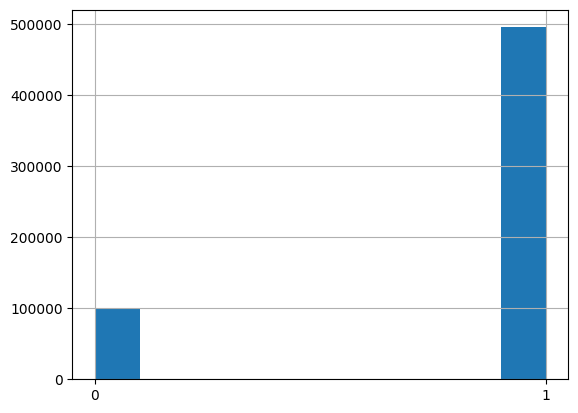

In [8]:
df["ps_car_08_cat"].hist()

In [9]:
df.rename(columns={"ps_car_08_cat": "ps_car_08_bin"}, inplace=True)
df["ps_car_08_bin"] = df["ps_car_08_bin"].astype("int")

bin_columns = [col for col in df.columns if 'bin' in col]
COLUMS_TO_CHECK.remove("ps_car_08_cat")
cat_columns.remove("ps_car_08_cat")

cat_bin_columns = bin_columns + cat_columns
no_cat_bin_columns = [col for col in COLUMS_TO_CHECK if col not in cat_bin_columns]


### Continuous Variables 

1. evaluate distribution of continuous variables
2. proposition how to handle Nan's for continuous variables

### Categorical Variables

accordingly to description all variables with 'cat' description are properly assigned. The only eventual categories we could be interested are ordinals. 
Therefore in this part following tasks are performed 

1. assign proper type for respective categorical variable ("category" type)
2. Analyse which categories can be considered as ordinals or just integers (treated the same as numerical but on integer set). For this we take categorical 
2. Variables with cardinality for values K > 10 keep as integers (check if there's no gaps)

In [10]:
K = 10

df = df.astype({col: "category" for col in cat_columns})
df[cat_columns].dtypes

ps_ind_02_cat    category
ps_ind_04_cat    category
ps_ind_05_cat    category
ps_car_01_cat    category
ps_car_02_cat    category
ps_car_03_cat    category
ps_car_04_cat    category
ps_car_05_cat    category
ps_car_06_cat    category
ps_car_07_cat    category
ps_car_09_cat    category
ps_car_10_cat    category
ps_car_11_cat    category
dtype: object

In [11]:
(df[cat_columns] == -1).any() | (df[cat_columns] == "-1").any()


ps_ind_02_cat    False
ps_ind_04_cat    False
ps_ind_05_cat    False
ps_car_01_cat    False
ps_car_02_cat    False
ps_car_03_cat    False
ps_car_04_cat    False
ps_car_05_cat    False
ps_car_06_cat    False
ps_car_07_cat    False
ps_car_09_cat    False
ps_car_10_cat    False
ps_car_11_cat    False
dtype: bool

In [12]:
high_cardinality_columns = [col for col in cat_columns if df[col].nunique() > K]
df[high_cardinality_columns].nunique()

ps_car_01_cat     13
ps_car_06_cat     18
ps_car_11_cat    104
dtype: int64

As observed "ps_car_[01|06|11]_cat" can be considered as variable not suited for category variable. Especially "ps_car_11_cat" as it has over 100 unique values

In [13]:
COLUMS_TO_CHECK = [col for col in COLUMS_TO_CHECK if col not in cat_bin_columns]
COLUMS_TO_CHECK

# df.dtypes
df[COLUMS_TO_CHECK].head()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,2.0,5.0,0.0,11.0,0.7,0.2,0.718070,2.0,0.400000,0.883679,0.370810,3.605551
1,1.0,7.0,0.0,3.0,0.8,0.4,0.766078,3.0,0.316228,0.618817,0.388716,2.449490
2,5.0,9.0,0.0,12.0,0.0,0.0,NaN,1.0,0.316228,0.641586,0.347275,3.316625
3,0.0,2.0,0.0,8.0,0.9,0.2,0.580948,1.0,0.374166,0.542949,0.294958,2.000000
4,0.0,0.0,0.0,9.0,0.7,0.6,0.840759,3.0,0.316070,0.565832,0.365103,2.000000


### Ordinal variables and Continous variables

from values included in rest of column it can be concluded that 'reg' columns and ps_car_12-15  are continuous and rest is oridnals

In [14]:
df[COLUMS_TO_CHECK].nunique()

ps_ind_01        8
ps_ind_03       12
ps_ind_14        5
ps_ind_15       14
ps_reg_01       10
ps_reg_02       19
ps_reg_03     5012
ps_car_11        4
ps_car_12      183
ps_car_13    69456
ps_car_14      849
ps_car_15       15
dtype: int64

In [15]:
df[COLUMS_TO_CHECK].apply(lambda x: max(x) - min(x))

ps_ind_01     7.000000
ps_ind_03    11.000000
ps_ind_14     4.000000
ps_ind_15    13.000000
ps_reg_01     0.900000
ps_reg_02     1.800000
ps_reg_03     3.976708
ps_car_11     3.000000
ps_car_12     1.164911
ps_car_13     3.470007
ps_car_14     0.526851
ps_car_15     3.741657
dtype: float64

In [16]:
ordinal_columns = ['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_car_11']
continuous_columns = [col for col in COLUMS_TO_CHECK if col not in ordinal_columns]

df[ordinal_columns].nunique()


ps_ind_01     8
ps_ind_03    12
ps_ind_14     5
ps_ind_15    14
ps_car_11     4
dtype: int64

Some of variables have Nan's. In order to deal with them those variable where there is only few values missing respective rows will be deleted ("ps_car_11" and "ps_car_")

In [27]:
df[ordinal_columns].isna().sum()

ps_ind_01    0
ps_ind_03    0
ps_ind_14    0
ps_ind_15    0
ps_car_11    0
dtype: int64

In [18]:
(df[continuous_columns].isna()).sum()

ps_reg_01         0
ps_reg_02         0
ps_reg_03    107772
ps_car_12         1
ps_car_13         0
ps_car_14     42620
ps_car_15         0
dtype: int64

In [19]:
df = df[~df["ps_car_11"].isna() & ~df["ps_car_12"].isna()]

In [20]:
df = df.astype({col: "int" for col in ordinal_columns})
df = df.astype({col: "float" for col in continuous_columns})

COLUMS_TO_CHECK = [col for col in COLUMS_TO_CHECK if col not in ordinal_columns + continuous_columns]
COLUMS_TO_CHECK

[]

In [21]:
ordinal_columns

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11']

Plotting ordinals

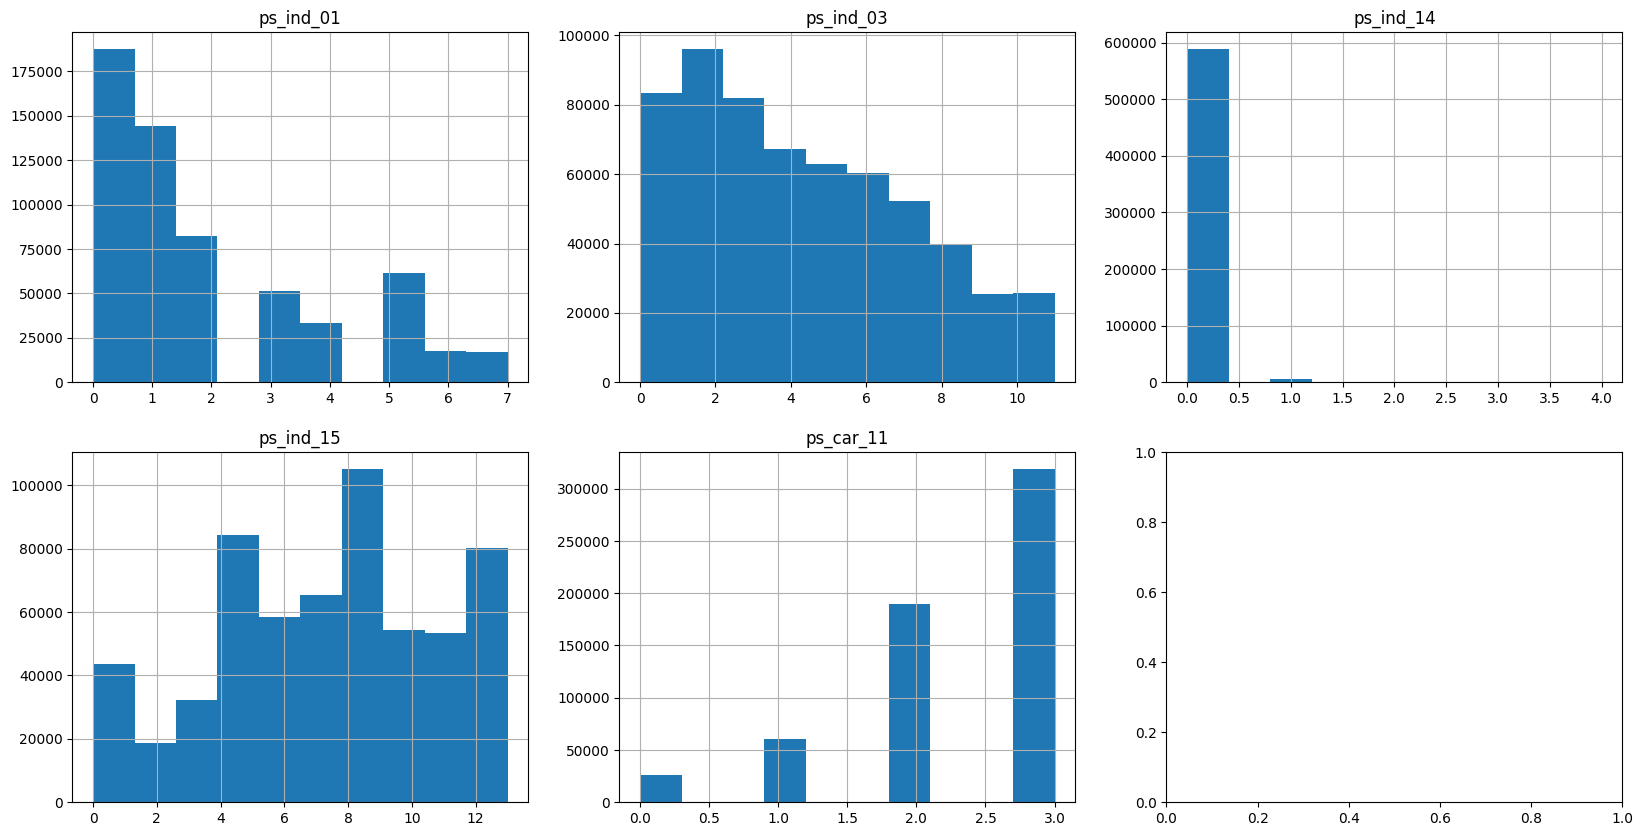

In [22]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2,3)

for i, col in enumerate(ordinal_columns[:6]):
    df[col].hist(ax=axis[i//3, i%3], figsize=(20, 10), bins=10)
    axis[i//3, i%3].set_title(col)

plt.show()

Corollary:

'ps_ind_14' also could be treated as binary

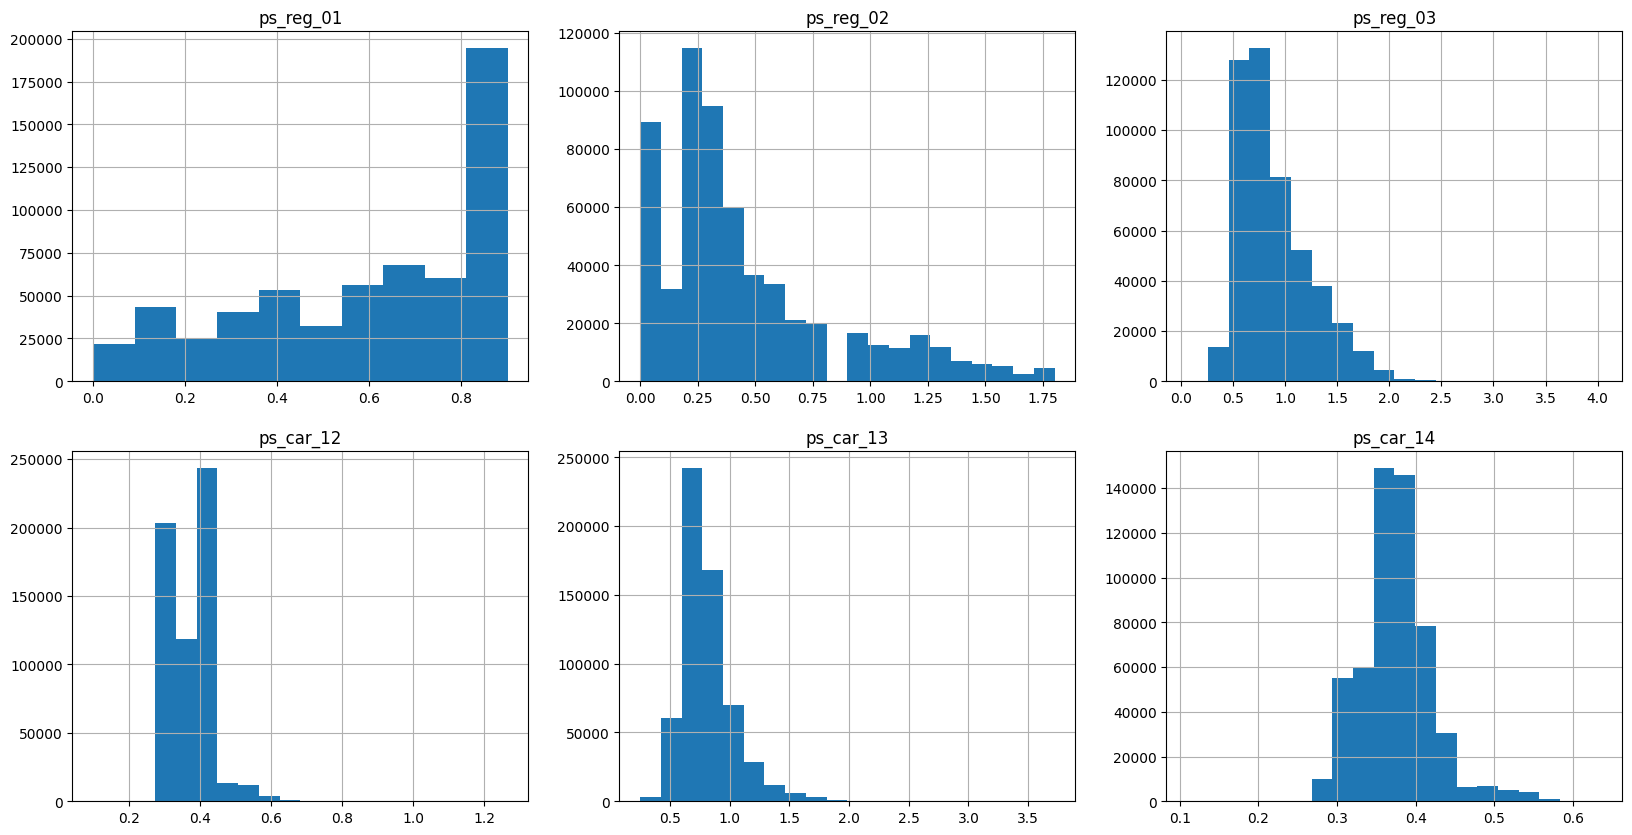

In [23]:

figure, axis = plt.subplots(2,3)

for i, col in enumerate(continuous_columns[:6]):
    df[col].hist(ax=axis[i//3, i%3], figsize=(20, 10), bins=20 if i != 0 else 10)
    axis[i//3, i%3].set_title(col)

plt.show()

## Missing Values
- handling missing values 
- properly assigning na's (-1)

Missing values in case of ps_reg_03 and ps_car_14 cannot be remove as they are to big part of dataset. Therefore in both cases a good proposition is to set the all Nan's for a mean value

In [24]:
df['ps_car_14'] = df['ps_car_14'].fillna(df['ps_car_14'].mean())
df['ps_reg_03'] = df['ps_reg_03'].fillna(df['ps_reg_03'].mean())


## Target Variable

array([[<Axes: title={'center': 'target'}>]], dtype=object)

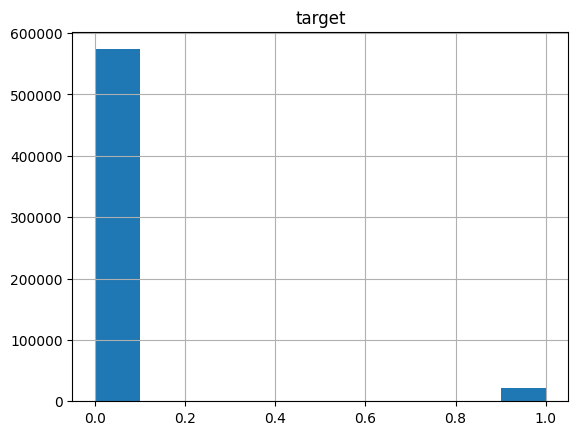

In [25]:
df[["target"]].hist()

## Summary and Findings

There are 39 columns with following characterics:
1. target variable (binary variable)
2. 12 binary variables
3. 13 categorical variables 
4. 7 continuous/interval variable
5. 5 ordinal variables

Findings:
1. ps_car_01_cat, ps_car_06_cat, ps_car_11_cat variables due to high cardinality shouldn't be considered as categorical, rather ordinal
2. Nan's in categorical variables were removed
3. Nan's in continuous variables were replaced with mean
4. ps_car_08_cat was renamed and effectively is a binary variables same with ps_ind_14


Given dataset was significantly wider and longer than bodyfat. Furthermore it contains additional nan's  which were handled